In [ ]:
from pathlib import Path
import pandas as pd

def get_latest_data(directory, pattern='*.xlsx'):
    """
    Get the most recently modified Excel/CSV file from the specified directory.
    
    Args:
        directory (str or Path): Directory to search for files
        pattern (str): File pattern to match (default: '*.xlsx')
        
    Returns:
        pandas.DataFrame: Data from the most recent file
    """
    cleaned_dir = Path(directory)
    
    # Get all matching files
    files = list(cleaned_dir.glob(pattern))
    if not files:
        raise FileNotFoundError(f"No {pattern} files found in {cleaned_dir}")
    
    # Get the most recent file
    latest_file = max(files, key=lambda f: f.stat().st_mtime)
    
    # Read the file based on its extension
    if latest_file.suffix.lower() == '.csv':
        return pd.read_csv(latest_file)
    else:
        return pd.read_excel(latest_file)

In [ ]:
df = pd.read_csv('path/to/adidas_sales_data.csv')


df.head()

In [ ]:
import pandas as pd

# Load the latest cleaned data
df = get_latest_data('datasets')

df.head()


In [6]:
import os
print(os.getcwd())


/Users/vishishtraam/Desktop/projects/dataflow


In [8]:
df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [9]:

df_clean = df.dropna()


In [10]:
import os

clean_folder = 'cleaned_data'
if not os.path.exists(clean_folder):
    os.makedirs(clean_folder)


In [11]:
clean_file_path = os.path.join(clean_folder, 'Adidas_US_Sales_Cleaned.xlsx')
df_clean.to_excel(clean_file_path, index=False)


In [ ]:
# Load the cleaned data for visualization
df_visualize = get_latest_data('cleaned_data')


In [ ]:
# Example: filter rows where 'Sales' is greater than 1000
filtered_df = df_visualize[df_visualize['Sales'] > 1000]

# Example: filter rows for a specific 'Region'
region_df = df_visualize[df_visualize['Region'] == 'West']


In [14]:
print(df_visualize.columns)


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')


In [ ]:
print('Summary statistics for numeric columns:')
print(df.describe())

# Identify numeric and categorical columns based on datatype
numeric_df = df.select_dtypes(include=[np.number])
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Histograms for numeric variables
if not numeric_df.empty:
    numeric_df.hist(bins=20, figsize=(15, 10));
else:
    print('No numeric columns to plot histograms.')

# Count plot for one of the categorical columns if available
if len(categorical_cols) > 0:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=categorical_cols[0])
    plt.title(f"Distribution of {categorical_cols[0]}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print('No categorical columns to plot countplot.')


In [18]:
print(len(df_visualize.columns))


14


In [ ]:
import pandas as pd

# Define your column names
column_names = [
    'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name',
    'Segment', 'Product Category', 'Product Sub-Category', 'Product Name',
    'Sales', 'Quantity', 'Discount', 'Profit', 'Region'
]

# Load the Excel file without headers and assign column names
df = pd.read_excel('adidas_us_sales.xlsx', header=None, names=column_names)

# Check the columns and first few rows
print(df.columns)
print(df.head())


In [ ]:
import pandas as pd

column_names = [
    'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name',
    'Segment', 'Product Category', 'Product Sub-Category', 'Product Name',
    'Sales', 'Quantity', 'Discount', 'Profit', 'Region'
]

# Update this path to your dataset location
file_path = 'Desktop/projects/dataflow/datasets/adidas_us_sales.xlsx'

df = pd.read_excel(file_path, header=None, names=column_names)

print(df.columns)
print(df.head())


In [21]:
import os
print(os.getcwd())


/Users/vishishtraam/Desktop/projects/dataflow


In [ ]:
import pandas as pd

column_names = [
    'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name',
    'Segment', 'Product Category', 'Product Sub-Category', 'Product Name',
    'Sales', 'Quantity', 'Discount', 'Profit', 'Region'
]

file_path = 'datasets/adidas_us_sales.xlsx'

df = pd.read_excel(file_path, header=None, names=column_names)

print(df.columns)
print(df.head())


In [23]:
import os

print(os.listdir('datasets'))


['Adidas US Sales Datasets.xlsx', '.DS_Store']


In [24]:
import pandas as pd

column_names = [
    'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name',
    'Segment', 'Product Category', 'Product Sub-Category', 'Product Name',
    'Sales', 'Quantity', 'Discount', 'Profit', 'Region'
]

file_path = 'datasets/Adidas US Sales Datasets.xlsx'

df = pd.read_excel(file_path, header=None, names=column_names)

print(df.columns)
print(df.head())


Index(['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name',
       'Segment', 'Product Category', 'Product Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Region'],
      dtype='object')
   Order ID Order Date              Ship Date   Customer ID Customer Name  \
0       NaN        NaN                    NaN           NaN           NaN   
1       NaN        NaN  Adidas Sales Database           NaN           NaN   
2       NaN        NaN                    NaN           NaN           NaN   
3       NaN        NaN                    NaN           NaN           NaN   
4       NaN   Retailer            Retailer ID  Invoice Date        Region   

  Segment Product Category Product Sub-Category    Product Name       Sales  \
0     NaN              NaN                  NaN             NaN         NaN   
1     NaN              NaN                  NaN             NaN         NaN   
2     NaN              NaN                  NaN             N

In [25]:
import pandas as pd

# Actual column names based on row 4 (you can tweak if needed)
column_names = [
    'State', 'City', 'Product', 'Price per Unit', 'Units Sold',
    'Quantity', 'Discount', 'Profit', 'Region', 'Order ID',
    'Order Date', 'Ship Date', 'Customer ID', 'Customer Name'
]

file_path = 'datasets/Adidas US Sales Datasets.xlsx'

# Skip first 4 rows, read from row 5 as header
df = pd.read_excel(file_path, skiprows=4)

print(df.columns)
print(df.head())


Index(['Unnamed: 0', 'Retailer', 'Retailer ID', 'Invoice Date', 'Region',
       'State', 'City', 'Product', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')
   Unnamed: 0     Retailer  Retailer ID Invoice Date     Region     State  \
0         NaN  Foot Locker      1185732   2020-01-01  Northeast  New York   
1         NaN  Foot Locker      1185732   2020-01-02  Northeast  New York   
2         NaN  Foot Locker      1185732   2020-01-03  Northeast  New York   
3         NaN  Foot Locker      1185732   2020-01-04  Northeast  New York   
4         NaN  Foot Locker      1185732   2020-01-05  Northeast  New York   

       City                    Product  Price per Unit  Units Sold  \
0  New York      Men's Street Footwear            50.0        1200   
1  New York    Men's Athletic Footwear            50.0        1000   
2  New York    Women's Street Footwear            40.0        1000   
3  New York  Wo

In [26]:
df = df.drop(columns=['Unnamed: 0'])


In [27]:
print(df)


         Retailer  Retailer ID Invoice Date     Region          State  \
0     Foot Locker      1185732   2020-01-01  Northeast       New York   
1     Foot Locker      1185732   2020-01-02  Northeast       New York   
2     Foot Locker      1185732   2020-01-03  Northeast       New York   
3     Foot Locker      1185732   2020-01-04  Northeast       New York   
4     Foot Locker      1185732   2020-01-05  Northeast       New York   
...           ...          ...          ...        ...            ...   
9643  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9644  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9645  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9646  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9647  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   

            City                    Product  Price per Unit  Units Sold  \
0       New York      Men's Street Footwear     

In [28]:
print(df.isnull().sum())


Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


In [29]:
print(df.duplicated().sum())


0


In [30]:
print(df.dtypes)


Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object


In [31]:
print(df.describe())


        Retailer ID                   Invoice Date  Price per Unit  \
count  9.648000e+03                           9648     9648.000000   
mean   1.173850e+06  2021-05-10 15:20:44.776119296       45.216625   
min    1.128299e+06            2020-01-01 00:00:00        7.000000   
25%    1.185732e+06            2021-02-17 00:00:00       35.000000   
50%    1.185732e+06            2021-06-04 00:00:00       45.000000   
75%    1.185732e+06            2021-09-16 00:00:00       55.000000   
max    1.197831e+06            2021-12-31 00:00:00      110.000000   
std    2.636038e+04                            NaN       14.705397   

        Units Sold    Total Sales  Operating Profit  Operating Margin  
count  9648.000000    9648.000000       9648.000000       9648.000000  
mean    256.930037   93273.437500      34425.244761          0.422991  
min       0.000000       0.000000          0.000000          0.100000  
25%     106.000000    4254.500000       1921.752500          0.350000  
50%     1

In [32]:
import os

# Define the new folder path inside dataflow
save_folder = '/Users/vishishtraam/Desktop/projects/dataflow/cleaned_data'

# Create the folder if it doesn't exist
os.makedirs(save_folder, exist_ok=True)

# Define the full path for the cleaned dataset
save_path = os.path.join(save_folder, 'adidas_us_sales_cleaned.csv')

# Save the DataFrame as CSV
df.to_csv(save_path, index=False)

print(f"Cleaned data saved at: {save_path}")


Cleaned data saved at: /Users/vishishtraam/Desktop/projects/dataflow/cleaned_data/adidas_us_sales_cleaned.csv


In [33]:
import pandas as pd

# Load the cleaned data
cleaned_df = pd.read_csv('/Users/vishishtraam/Desktop/projects/dataflow/cleaned_data/adidas_us_sales_cleaned.csv')

# Example filter: show only rows where Region is 'Northeast' and Units Sold > 500
filtered_df = cleaned_df[(cleaned_df['Region'] == 'Northeast') & (cleaned_df['Units Sold'] > 500)]

print(filtered_df.head())


      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0              0.50     In-store  
1   

In [34]:
northeast_sales = df[df['Region'] == 'Northeast']
print(northeast_sales.head())


      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0              0.50     In-store  
1   

In [35]:
high_volume_sales = df[df['Units Sold'] > 1000]
print(high_volume_sales.head())


       Retailer  Retailer ID Invoice Date     Region     State      City  \
0   Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
6   Foot Locker      1185732   2020-01-07  Northeast  New York  New York   
12  Foot Locker      1185732   2020-01-25  Northeast  New York  New York   
18  Foot Locker      1185732   2020-01-31  Northeast  New York  New York   
24  Foot Locker      1185732   2020-02-06  Northeast  New York  New York   

                  Product  Price per Unit  Units Sold  Total Sales  \
0   Men's Street Footwear            50.0        1200     600000.0   
6   Men's Street Footwear            50.0        1250     625000.0   
12  Men's Street Footwear            50.0        1220     610000.0   
18  Men's Street Footwear            50.0        1200     600000.0   
24  Men's Street Footwear            60.0        1220     732000.0   

    Operating Profit  Operating Margin Sales Method  
0           300000.0               0.5     In-store  
6           31

In [36]:
total_sales_by_product = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
print(total_sales_by_product)
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

monthly_units_sold = df.groupby(df['Invoice Date'].dt.to_period('M'))['Units Sold'].sum()
print(monthly_units_sold)


Product
Men's Street Footwear        208826244.0
Women's Apparel              179038860.0
Men's Athletic Footwear      153673680.0
Women's Street Footwear      128002813.0
Men's Apparel                123728632.0
Women's Athletic Footwear    106631896.0
Name: Total Sales, dtype: float64
Invoice Date
2020-01     48333
2020-02     37846
2020-03     46972
2020-04     54709
2020-05     35705
2020-06     16269
2020-07     38219
2020-08     62307
2020-09     46125
2020-10     30167
2020-11     25152
2020-12     20545
2021-01    179299
2021-02    156113
2021-03    143988
2021-04    161717
2021-05    178900
2021-06    164745
2021-07    180481
2021-08    195414
2021-09    182425
2021-10    152834
2021-11    149350
2021-12    171246
Freq: M, Name: Units Sold, dtype: int64


In [37]:
avg_profit_by_region = df.groupby('Region')['Operating Profit'].mean()
print(avg_profit_by_region)


Region
Midwest      28211.189359
Northeast    28628.193455
South        35380.789392
Southeast    49473.379657
West         36605.149734
Name: Operating Profit, dtype: float64


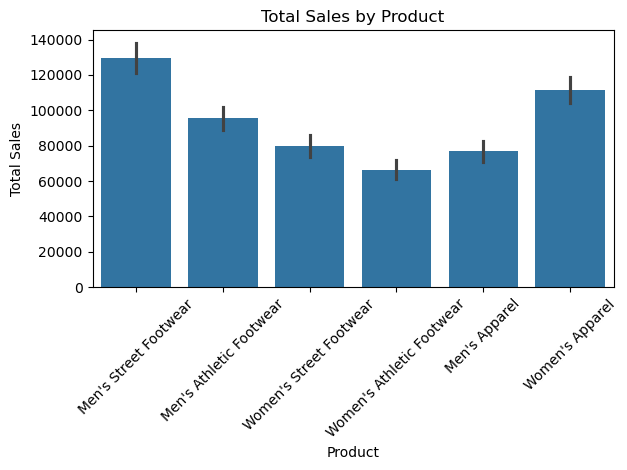

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample plot
sns.barplot(x='Product', y='Total Sales', data=df)
plt.xticks(rotation=45)
plt.title('Total Sales by Product')
plt.tight_layout()
plt.show()


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_excel('path_to_cleaned_adidas_us_sales.xlsx')

# 1. Total Sales by Product
plt.figure(figsize=(10,6))
sales_by_product = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')
plt.title('Total Sales by Product')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product')
plt.show()

# 2. Monthly Units Sold Trend
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['YearMonth'] = df['Invoice Date'].dt.to_period('M')
monthly_units_sold = df.groupby('YearMonth')['Units Sold'].sum()

plt.figure(figsize=(12,6))
monthly_units_sold.plot(marker='o')
plt.title('Monthly Units Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3. Sales by Region
plt.figure(figsize=(8,6))
sales_by_region = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='coolwarm')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.show()

# 4. Units Sold vs Price per Unit Scatter Plot (colored by Product)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price per Unit', y='Units Sold', hue='Product', alpha=0.7)
plt.title('Units Sold vs Price per Unit by Product')
plt.xlabel('Price per Unit ($)')
plt.ylabel('Units Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# 5. Profit Margin Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Operating Margin'], bins=30, kde=True, color='green')
plt.title('Distribution of Operating Margin')
plt.xlabel('Operating Margin')
plt.ylabel('Frequency')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_cleaned_adidas_us_sales.xlsx'

In [40]:
import os
print(os.getcwd())


/Users/vishishtraam/Desktop/projects/dataflow


In [41]:
df.to_excel('cleaned/cleaned_adidas_us_sales.xlsx', index=False)


OSError: Cannot save file into a non-existent directory: 'cleaned'

In [42]:
import os

# Create the folder if it doesn't exist
os.makedirs('cleaned', exist_ok=True)

# Now save the dataframe
df.to_excel('cleaned/cleaned_adidas_us_sales.xlsx', index=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_excel('path_to_cleaned_adidas_us_sales.xlsx')

# 1. Total Sales by Product
plt.figure(figsize=(10,6))
sales_by_product = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')
plt.title('Total Sales by Product')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product')
plt.show()

# 2. Monthly Units Sold Trend
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['YearMonth'] = df['Invoice Date'].dt.to_period('M')
monthly_units_sold = df.groupby('YearMonth')['Units Sold'].sum()

plt.figure(figsize=(12,6))
monthly_units_sold.plot(marker='o')
plt.title('Monthly Units Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3. Sales by Region
plt.figure(figsize=(8,6))
sales_by_region = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='coolwarm')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.show()

# 4. Units Sold vs Price per Unit Scatter Plot (colored by Product)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price per Unit', y='Units Sold', hue='Product', alpha=0.7)
plt.title('Units Sold vs Price per Unit by Product')
plt.xlabel('Price per Unit ($)')
plt.ylabel('Units Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# 5. Profit Margin Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Operating Margin'], bins=30, kde=True, color='green')
plt.title('Distribution of Operating Margin')
plt.xlabel('Operating Margin')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset — replace the path below with your actual file path
df = pd.read_excel('cleaned/cleaned_adidas_us_sales.xlsx')

# 1. Total Sales by Product (Bar chart)
plt.figure(figsize=(10,6))
sales_by_product = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')
plt.title('Total Sales by Product')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product')
plt.show()

# 2. Monthly Units Sold Trend (Line chart)
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['YearMonth'] = df['Invoice Date'].dt.to_period('M')
monthly_units_sold = df.groupby('YearMonth')['Units Sold'].sum()

plt.figure(figsize=(12,6))
monthly_units_sold.plot(marker='o')
plt.title('Monthly Units Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3. Sales by Region (Bar chart)
plt.figure(figsize=(8,6))
sales_by_region = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='coolwarm')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.show()

# 4. Units Sold vs Price per Unit Scatter Plot (colored by Product)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price per Unit', y='Units Sold', hue='Product', alpha=0.7)
plt.title('Units Sold vs Price per Unit by Product')
plt.xlabel('Price per Unit ($)')
plt.ylabel('Units Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# 5. Profit Margin Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Operating Margin'], bins=30, kde=True, color='green')
plt.title('Distribution of Operating Margin')
plt.xlabel('Operating Margin')
plt.ylabel('Frequency')
plt.show()


/var/folders/8j/x9lyph2d3gs2jpd9j543yqb80000gn/T/ipykernel_12885/829130218.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')


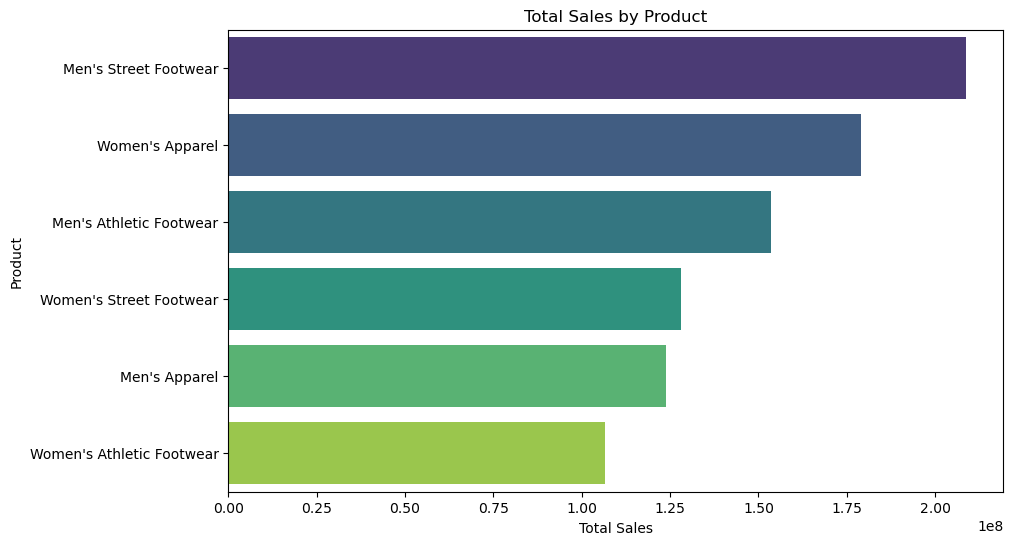

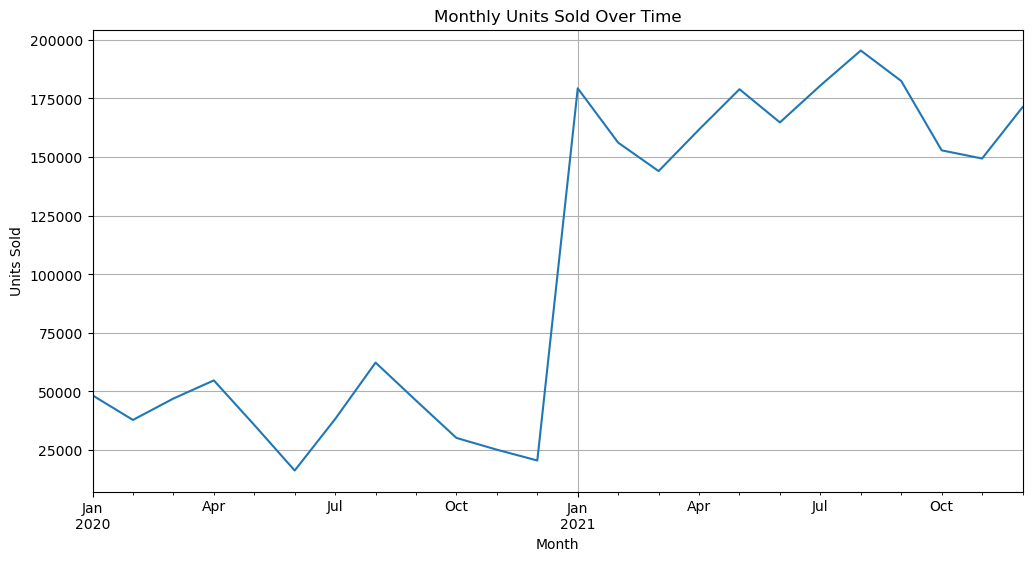

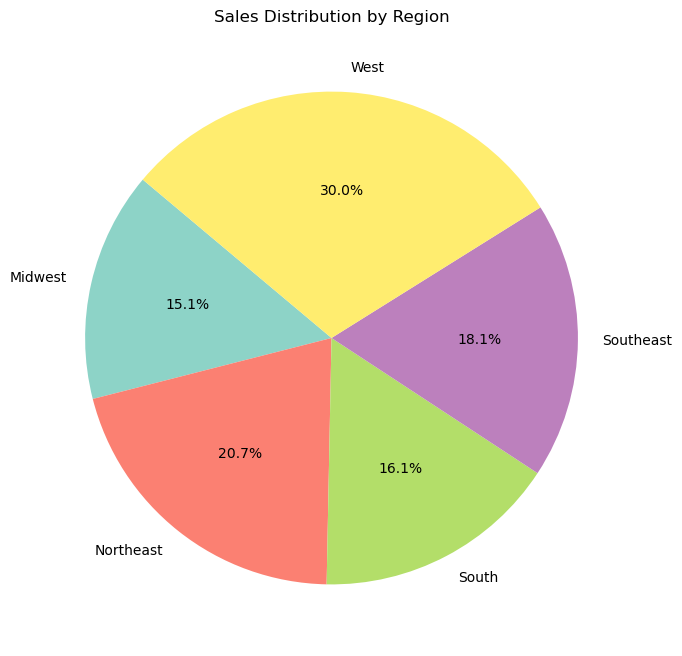

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Total Sales by Product (Bar chart)
plt.figure(figsize=(10,6))
sales_by_product = cleaned_df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')
plt.title('Total Sales by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

# 2. Monthly Units Sold Trend (Line chart)
cleaned_df['Invoice Date'] = pd.to_datetime(cleaned_df['Invoice Date'])
monthly_units = cleaned_df.groupby(cleaned_df['Invoice Date'].dt.to_period('M'))['Units Sold'].sum()
monthly_units.index = monthly_units.index.to_timestamp()

plt.figure(figsize=(12,6))
monthly_units.plot()
plt.title('Monthly Units Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

# 3. Sales by Region (Pie chart)
sales_by_region = cleaned_df.groupby('Region')['Total Sales'].sum()

plt.figure(figsize=(8,8))
sales_by_region.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset — replace the path below with your actual file path
df = pd.read_excel('cleaned/cleaned_adidas_us_sales.xlsx')

# 1. Total Sales by Product (Bar chart)
plt.figure(figsize=(10,6))
sales_by_product = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')
plt.title('Total Sales by Product')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product')
plt.show()

# 2. Monthly Units Sold Trend (Line chart)
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['YearMonth'] = df['Invoice Date'].dt.to_period('M')
monthly_units_sold = df.groupby('YearMonth')['Units Sold'].sum()

plt.figure(figsize=(12,6))
monthly_units_sold.plot(marker='o')
plt.title('Monthly Units Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3. Sales by Region (Bar chart)
plt.figure(figsize=(8,6))
sales_by_region = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='coolwarm')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.show()

# 4. Units Sold vs Price per Unit Scatter Plot (colored by Product)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price per Unit', y='Units Sold', hue='Product', alpha=0.7)
plt.title('Units Sold vs Price per Unit by Product')
plt.xlabel('Price per Unit ($)')
plt.ylabel('Units Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# 5. Profit Margin Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Operating Margin'], bins=30, kde=True, color='green')
plt.title('Distribution of Operating Margin')
plt.xlabel('Operating Margin')
plt.ylabel('Frequency')
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset - update this path as per your file location
df = pd.read_excel('cleaned/cleaned_adidas_us_sales.xlsx')

# 1. Total Sales by Product (Bar chart)
plt.figure(figsize=(10,6))
sales_by_product = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')
plt.title('Total Sales by Product')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

# 2. Monthly Units Sold Trend (Line chart)
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['YearMonth'] = df['Invoice Date'].dt.to_period('M')
monthly_units_sold = df.groupby('YearMonth')['Units Sold'].sum()
monthly_units_sold.index = monthly_units_sold.index.to_timestamp()

plt.figure(figsize=(12,6))
monthly_units_sold.plot(marker='o')
plt.title('Monthly Units Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Sales by Region (Bar chart)
plt.figure(figsize=(8,6))
sales_by_region = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='coolwarm')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

# 4. Units Sold vs Price per Unit Scatter Plot (colored by Product)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price per Unit', y='Units Sold', hue='Product', alpha=0.7)
plt.title('Units Sold vs Price per Unit by Product')
plt.xlabel('Price per Unit ($)')
plt.ylabel('Units Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5. Profit Margin Distribution (Histogram with KDE)
plt.figure(figsize=(8,6))
sns.histplot(df['Operating Margin'], bins=30, kde=True, color='green')
plt.title('Distribution of Operating Margin')
plt.xlabel('Operating Margin')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [3]:
import pandas as pd

df = pd.read_csv('../adidas_us_sales_cleaned.csv')


FileNotFoundError: [Errno 2] No such file or directory: '../adidas_us_sales_cleaned.csv'

In [4]:
!pwd
!ls ../dataflow


/Users/vishishtraam/Desktop/projects/dataflow
README.md    cleaned      cleaned_data datasets


In [5]:
!ls


README.md    cleaned      cleaned_data datasets


In [6]:


df = pd.read_csv('../cleaned_data/adidas_us_sales_cleaned.csv')


FileNotFoundError: [Errno 2] No such file or directory: '../cleaned_data/adidas_us_sales_cleaned.csv'

In [7]:
!ls ../cleaned_data


ls: ../cleaned_data: No such file or directory


In [8]:
import os
import pandas as pd

# Define the base directory (current working directory or any other)
base_dir = os.getcwd()  # Or specify a fixed base path if needed

# Construct the full file path dynamically
file_path = os.path.join(base_dir, 'cleaned', 'cleaned_adidas_us_sales.xlsx')

# Load the Excel file
df = pd.read_excel(file_path)


/var/folders/8j/x9lyph2d3gs2jpd9j543yqb80000gn/T/ipykernel_15197/3814721604.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')


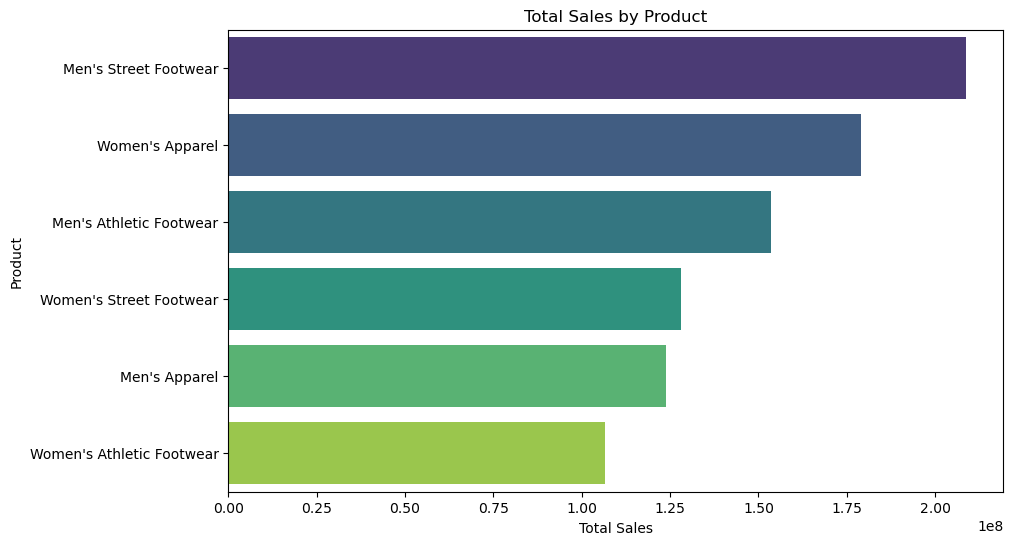

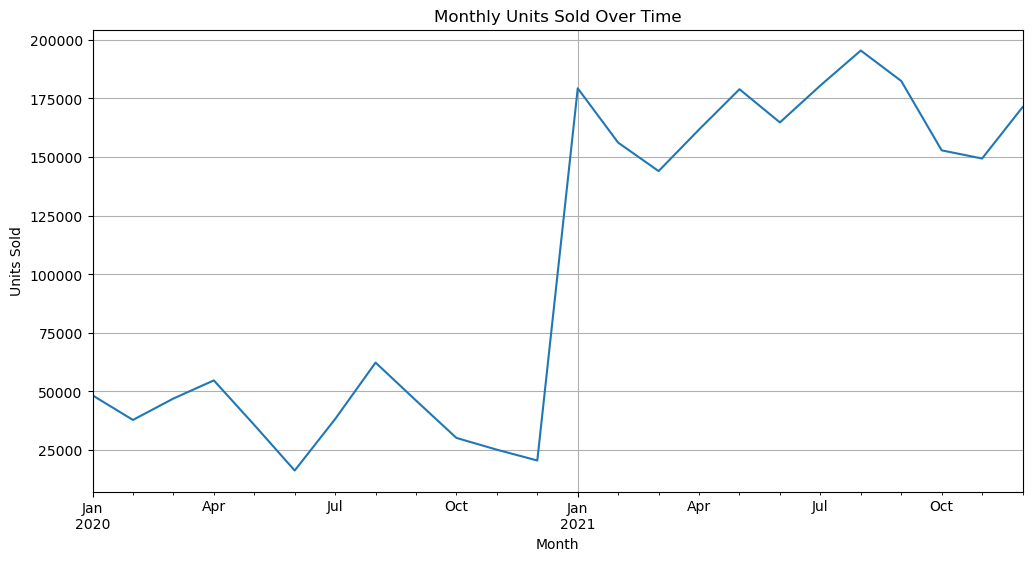

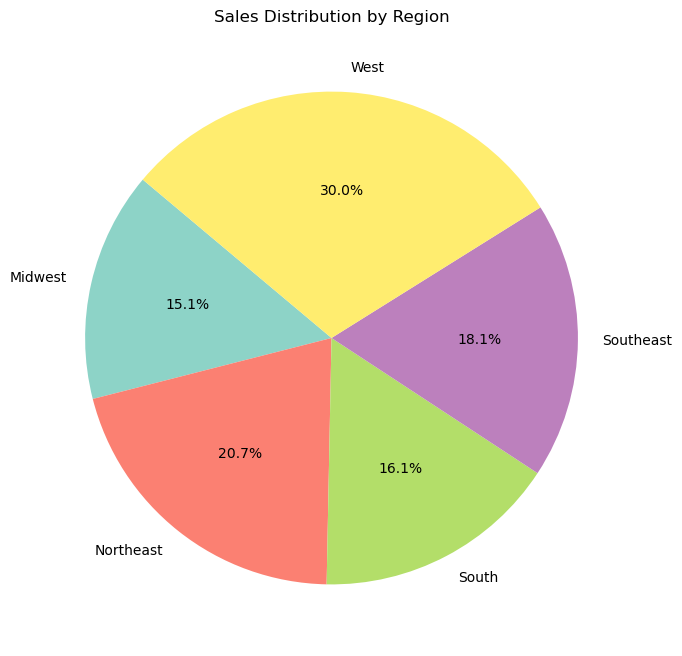

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Total Sales by Product (Bar chart)
plt.figure(figsize=(10,6))
sales_by_product = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')
plt.title('Total Sales by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

# 2. Monthly Units Sold Trend (Line chart)
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
monthly_units = df.groupby(df['Invoice Date'].dt.to_period('M'))['Units Sold'].sum()
monthly_units.index = monthly_units.index.to_timestamp()

plt.figure(figsize=(12,6))
monthly_units.plot()
plt.title('Monthly Units Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

# 3. Sales by Region (Pie chart)
sales_by_region = df.groupby('Region')['Total Sales'].sum()

plt.figure(figsize=(8,8))
sales_by_region.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()


/var/folders/8j/x9lyph2d3gs2jpd9j543yqb80000gn/T/ipykernel_15197/3522688420.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')


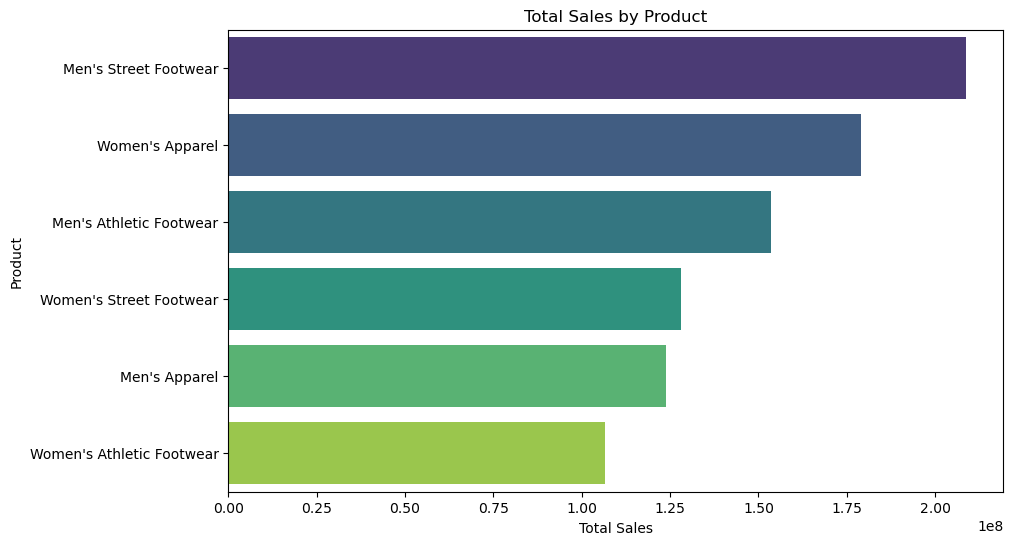

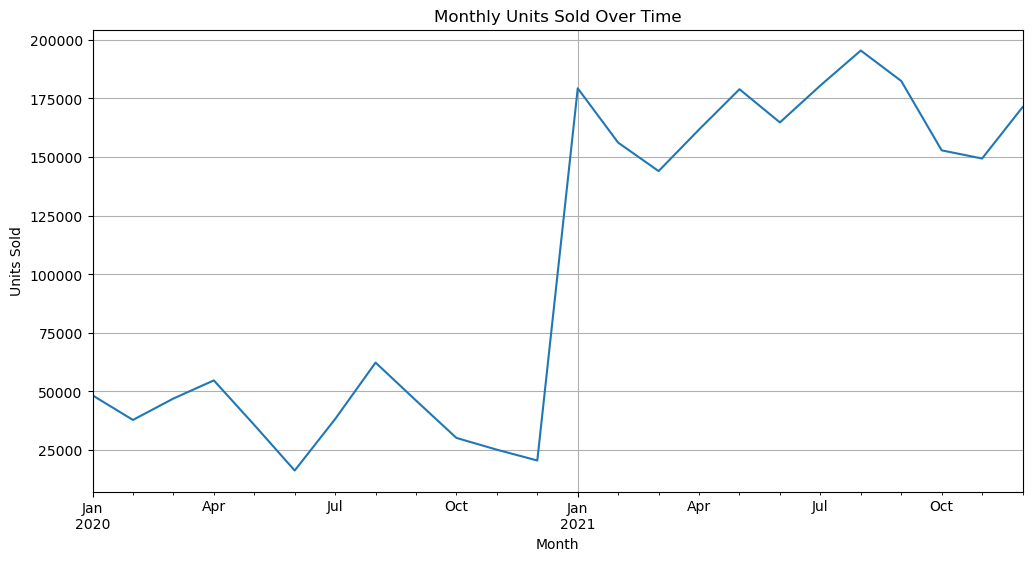

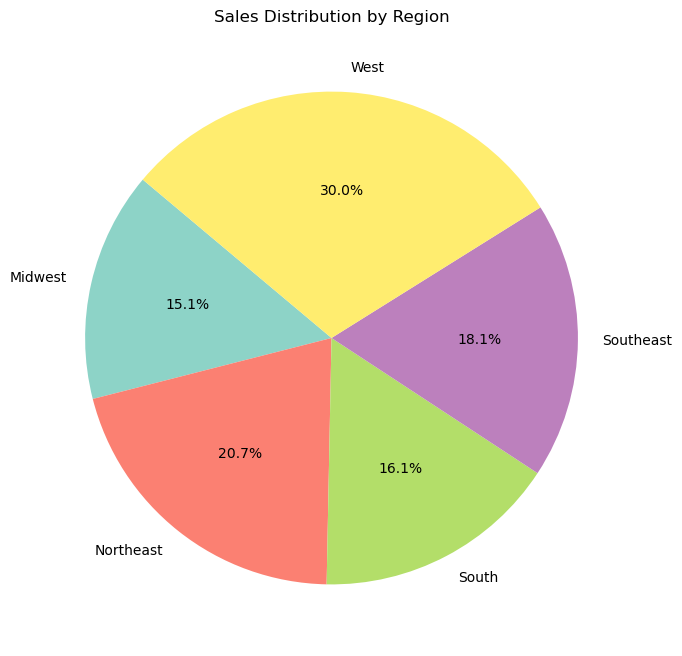

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded

# 1. Total Sales by Product (Bar chart with pandas + seaborn)
sales_by_product = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')
plt.title('Total Sales by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

# 2. Monthly Units Sold Trend (Line chart using pandas plotting)
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
monthly_units = df.groupby(df['Invoice Date'].dt.to_period('M'))['Units Sold'].sum()
monthly_units.index = monthly_units.index.to_timestamp()

plt.figure(figsize=(12,6))
monthly_units.plot()
plt.title('Monthly Units Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

# 3. Sales by Region (Pie chart with pandas)
sales_by_region = df.groupby('Region')['Total Sales'].sum()

plt.figure(figsize=(8,8))
sales_by_region.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()
